In [1]:
# pip install wordcloud
# requierment already satisfied

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from scipy import stats

In [53]:
data = pd.read_csv('Final Project Data.csv', index_col='Unnamed: 0')

In [54]:
data.columns

Index(['link', 'genre', 'date', 'day_data', 'shares', 'title_word_count',
       'content_word_count', 'avg_positive_polarity', 'avg_negative_polarity',
       'title_sentiment_polarity'],
      dtype='object')

In [55]:
# data = data.drop(columns=['Unnamed: 0'])

In [56]:
data.head()

,link,genre,date,day_data,shares,title_word_count,content_word_count,avg_positive_polarity,avg_negative_polarity,title_sentiment_polarity
0,http://mashable.com/2013/01/07/amazon-instant-...,entertainment,2013-01-07,monday,593,12.0,219.0,0.378636,-0.350000,-0.187500
1,http://mashable.com/2013/01/07/ap-samsung-spon...,business,2013-01-07,monday,711,9.0,255.0,0.286915,-0.118750,0.000000
2,http://mashable.com/2013/01/07/apple-40-billio...,business,2013-01-07,monday,1500,9.0,211.0,0.495833,-0.466667,0.000000
3,http://mashable.com/2013/01/07/astronaut-notre...,entertainment,2013-01-07,monday,1200,9.0,531.0,0.385965,-0.369697,0.000000
4,http://mashable.com/2013/01/07/att-u-verse-apps/,technology,2013-01-07,monday,505,13.0,1072.0,0.411127,-0.220192,0.136364


In [57]:
data.describe()

,shares,title_word_count,content_word_count,avg_positive_polarity,avg_negative_polarity,title_sentiment_polarity
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,3395.380184,10.398749,546.514731,0.353825,-0.259524,0.071425
std,11626.950749,2.114037,471.107508,0.104542,0.127726,0.265450
min,1.000000,2.000000,0.000000,0.000000,-1.000000,-1.000000
25%,946.000000,9.000000,246.000000,0.306244,-0.328383,0.000000
50%,1400.000000,10.000000,409.000000,0.358755,-0.253333,0.000000
75%,2800.000000,12.000000,716.000000,0.411428,-0.186905,0.150000
max,843300.000000,23.000000,8474.000000,1.000000,0.000000,1.000000


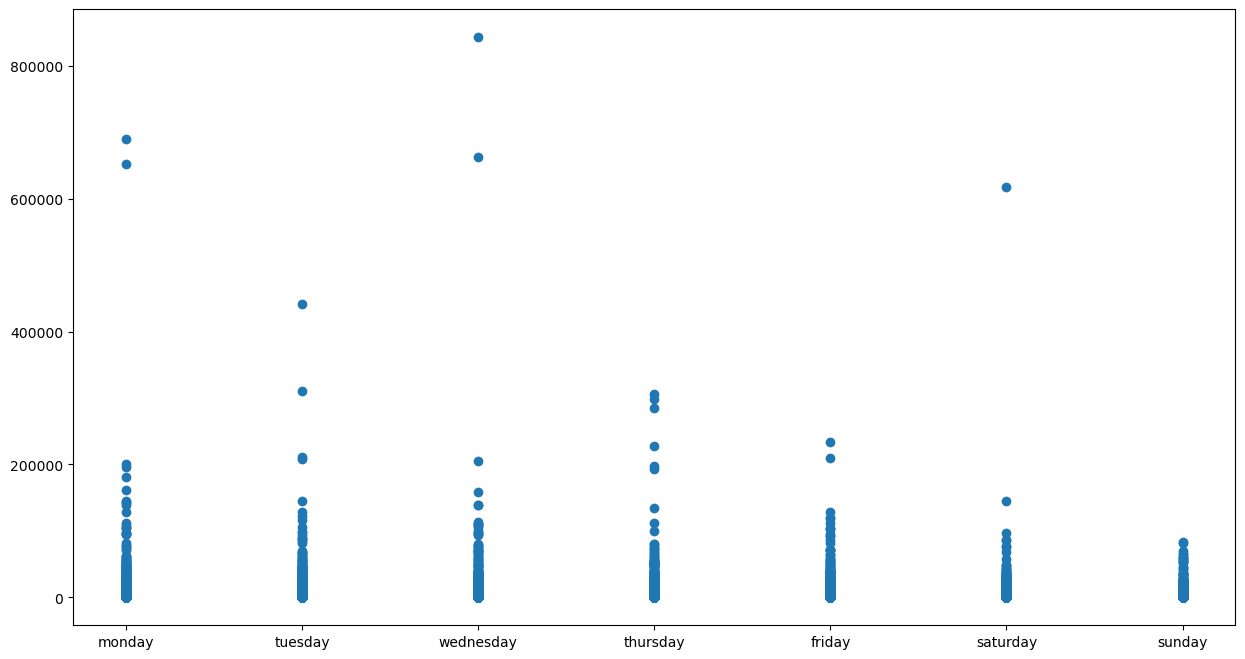

In [58]:
plt.figure(figsize=(15,8))
plt.scatter(data['day_data'],data['shares'])
plt.show()

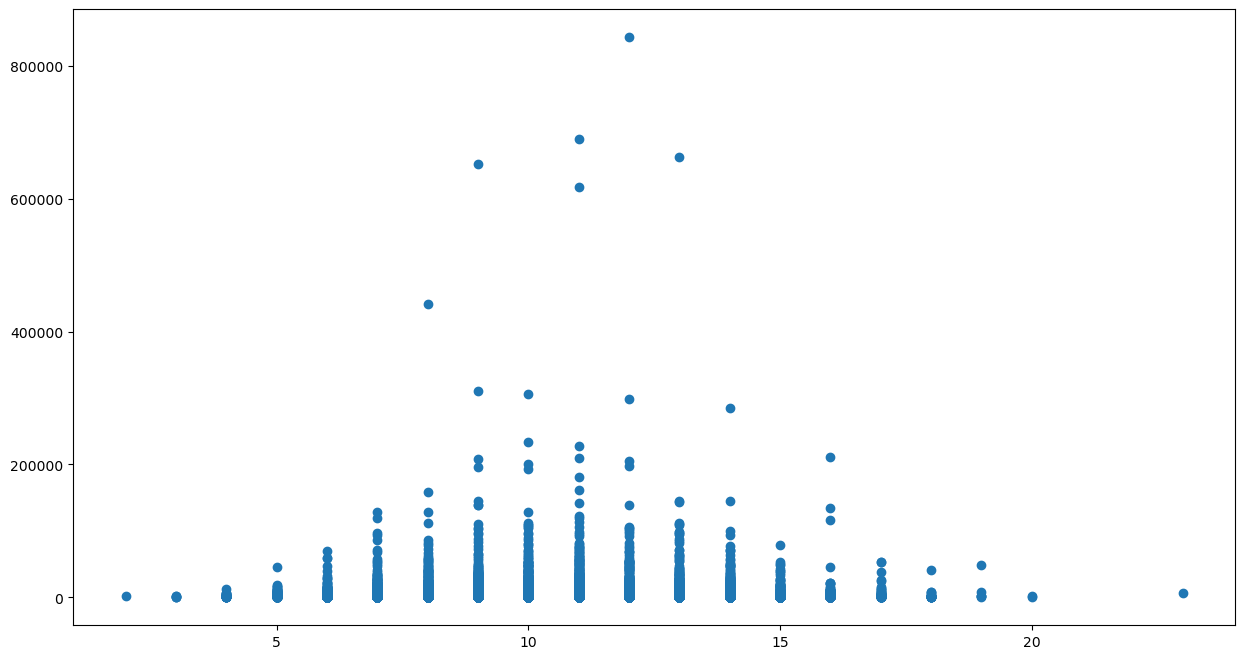

In [59]:
plt.figure(figsize=(15,8))
plt.scatter(data['title_word_count'],data['shares'])
plt.show()

In [60]:
# Convert 'shares' column to numeric (if it's not already numeric)
data['shares'] = pd.to_numeric(data['shares'], errors='coerce')

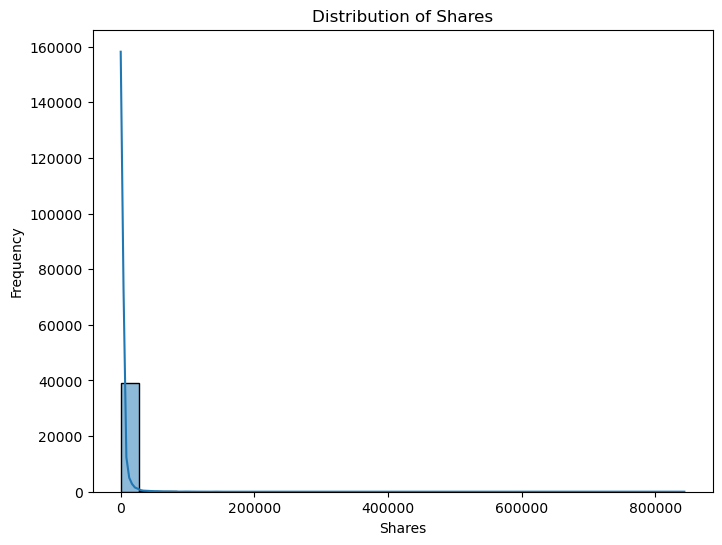

In [61]:
# Bar Chart / Histogram: Distribution of shares for different news articles
plt.figure(figsize=(8, 6))
sns.histplot(data['shares'], bins=30, kde=True)
plt.title('Distribution of Shares')
plt.xlabel('Shares')
plt.ylabel('Frequency')
plt.show()

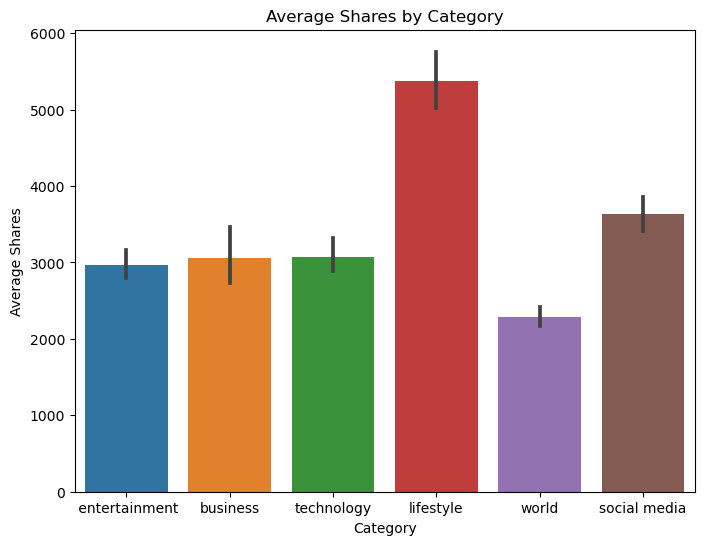

In [84]:
# Compare average shares of articles from different categories
plt.figure(figsize=(8, 6))
sns.barplot(x='genre', y='shares', data=data, estimator='mean')
plt.title('Average Shares by Category')
plt.xlabel('Category')
plt.ylabel('Average Shares')
plt.savefig('Barchart of Average Shares by Category.png')
plt.show()

In [23]:
# Line Chart: Trend of shares over time

In [21]:
data['date'] = pd.to_datetime(data['date'])
data['month_year'] = data['date'].dt.to_period('M')

In [22]:
data['month_year']

0        2013-01
1        2013-01
2        2013-01
3        2013-01
4        2013-01
          ...   
39639    2014-12
39640    2014-12
39641    2014-12
39642    2014-12
39643    2014-12
Name: month_year, Length: 39644, dtype: period[M]

In [29]:
# Extract month names from 'month_year' column
data['month_name'] = data['date'].dt.strftime('%B')
data['month_name'] = pd.Categorical(data['month_name'], 
                                    categories=['January', 'February', 'March', 'April', 'May', 'June', 
                                                'July', 'August', 'September', 'October', 'November',
                                                'December'],
                                    ordered=True)

# Group by 'month_year' and calculate mean shares
shares_over_time = data.groupby('month_name')['shares'].mean().reset_index()

In [ ]:
shares_over_time

In [ ]:
try:
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='month_name', y='shares', data=shares_over_time)
    plt.title('Trend of Shares Over Time')
    plt.xlabel('Month-Year')
    plt.ylabel('Average Shares')
    plt.xticks(rotation=45)
    plt.savefig('Lineplot of Trend of Shares Over Time.png')
    plt.show()
except Exception as e:
    print(e)'

In [30]:
# Split data into two subsets for 2013 and 2014
data_2013 = data[data['month_year'].dt.year == 2013]
data_2014 = data[data['month_year'].dt.year == 2014]
# For 2013
shares_over_time_2013 = data_2013.groupby('month_name')['shares'].mean().reset_index()
# For 2014
shares_over_time_2014 = data_2014.groupby('month_name')['shares'].mean().reset_index()

,month_name,shares
0,January,0.011942
1,February,-0.009334
2,March,0.053451
3,April,0.022643
4,May,-0.013317
5,June,-0.046325
6,July,-0.008568
7,August,-0.026828
8,September,-0.008630
9,October,-0.018318


In [35]:
# shares_over_time_2013, shares_over_time_2014

(   month_name    shares
 0     January -0.075443
 1    February -0.016212
 2       March  0.077102
 3       April  0.015517
 4         May -0.027879
 5        June -0.073750
 6        July  0.019030
 7      August -0.024397
 8   September -0.004783
 9     October  0.004016
 10   November  0.137127
 11   December  0.100228,
    month_name    shares
 0     January  0.097032
 1    February -0.001990
 2       March  0.028686
 3       April  0.028872
 4         May  0.000148
 5        June -0.025083
 6        July -0.030770
 7      August -0.028950
 8   September -0.011574
 9     October -0.035262
 10   November -0.040271
 11   December -0.039850)

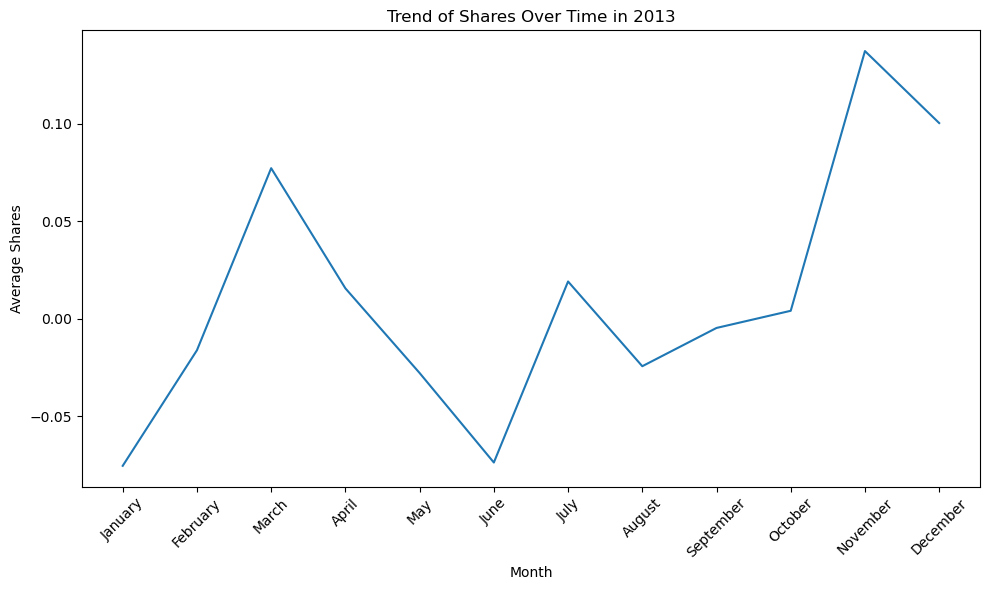

In [37]:
# Plotting shares over time 2013
try:
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='month_name', y='shares', data=shares_over_time_2013)
    plt.title('Trend of Shares Over Time in 2013')
    plt.xlabel('Month')
    plt.ylabel('Average Shares')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('Lineplot of Trend of Shares Over Time 2013.png')
    plt.show()
except Exception as e:
    print(e)

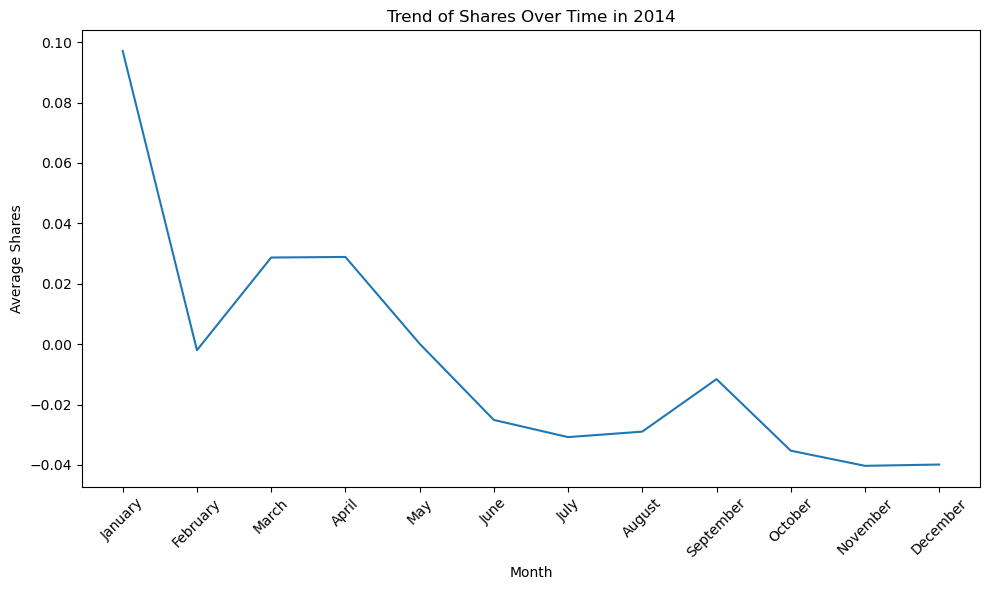

In [38]:
# Plotting shares over time 2014
try:
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='month_name', y='shares', data=shares_over_time_2014)
    plt.title('Trend of Shares Over Time in 2014')
    plt.xlabel('Month')
    plt.ylabel('Average Shares')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('Lineplot of Trend of Shares Over Time 2014.png')
    plt.show()
except Exception as e:
    print(e)

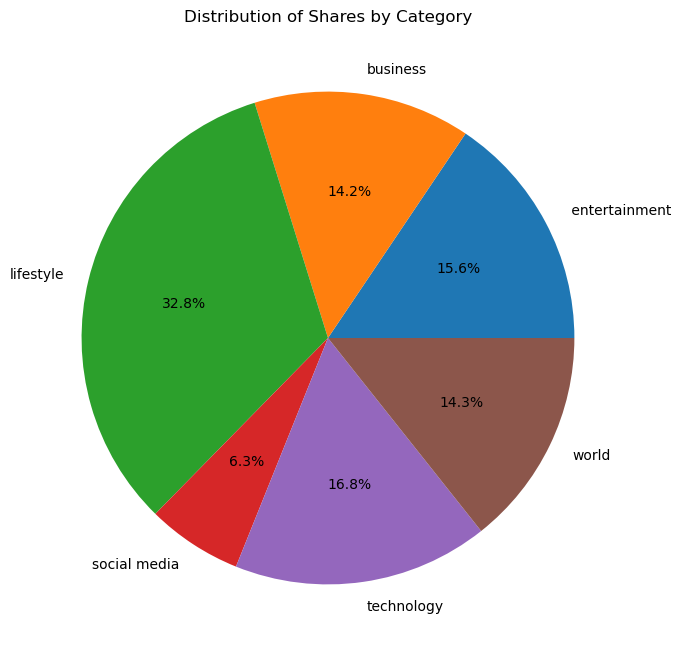

In [29]:
# Pie Chart: Distribution of shares among different categories
category_shares = data.groupby('genre')['shares'].sum()
plt.figure(figsize=(8, 8))
plt.pie(category_shares, labels=category_shares.index, autopct='%1.1f%%')
plt.title('Distribution of Shares by Category')
plt.savefig('Piechart of Distribution of Shares by Category.png')
plt.show()

In [30]:
# Filter data for points with shares <= 200000 and > 200000
data_below_200k = data[data['shares'] <= 200000]
data_above_200k = data[data['shares'] > 200000]

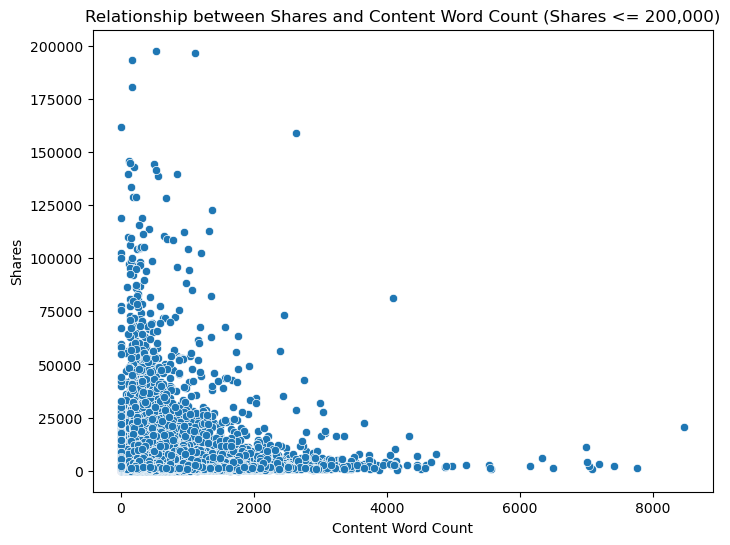

In [31]:
# Scatter Plot for shares <= 200000
plt.figure(figsize=(8, 6))
sns.scatterplot(x='content_word_count', y='shares', data=data_below_200k)
plt.title('Relationship between Shares and Content Word Count (Shares <= 200,000)')
plt.xlabel('Content Word Count')
plt.ylabel('Shares')
plt.savefig('Scatter plot for Shares and Content Word Count (Shares less than 200,000).png')
plt.show()

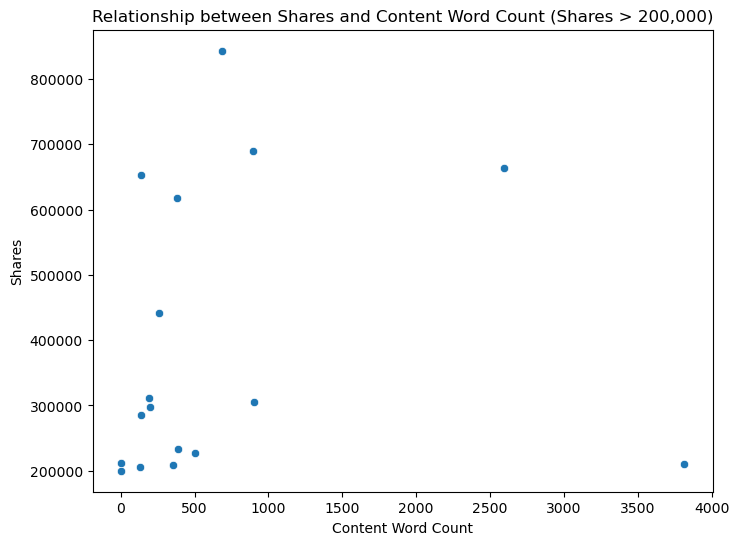

In [32]:
# Scatter Plot for shares > 200000
plt.figure(figsize=(8, 6))
sns.scatterplot(x='content_word_count', y='shares', data=data_above_200k)
plt.title('Relationship between Shares and Content Word Count (Shares > 200,000)')
plt.xlabel('Content Word Count')
plt.ylabel('Shares')
plt.show()

In [65]:
data['data_below_200k'] = data['shares'] <= 200000

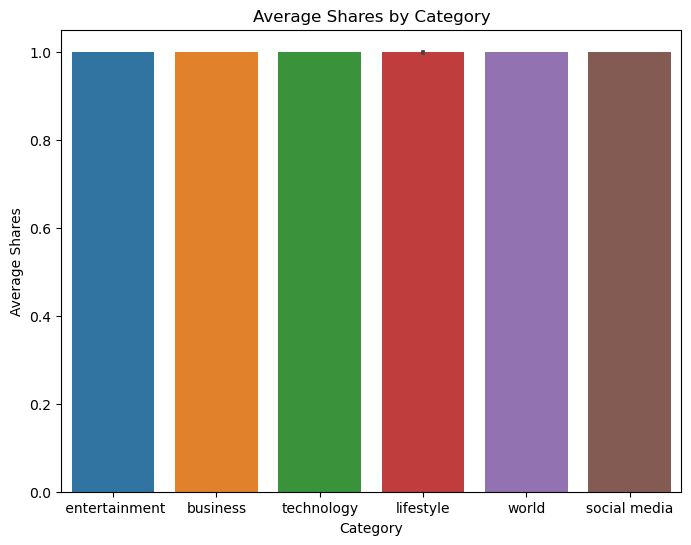

In [66]:
# Compare average shares of articles from different categories
plt.figure(figsize=(8, 6))
sns.barplot(x='genre', y='data_below_200k', data=data, estimator='mean')
plt.title('Average Shares by Category')
plt.xlabel('Category')
plt.ylabel('Average Shares')
plt.savefig('Barchart of Average Shares by Category.png')
plt.show()

In [69]:
data.dtypes

link                         object
genre                        object
date                         object
day_data                     object
shares                        int64
title_word_count            float64
content_word_count          float64
avg_positive_polarity       float64
avg_negative_polarity       float64
title_sentiment_polarity    float64
data_below_200k                bool
dtype: object

In [75]:
h_data = pd.read_csv('Final Project Data Encoded.csv', index_col='Unnamed: 0')

In [76]:
h_data.columns

Index(['link', 'date', 'shares', 'title_word_count', 'content_word_count',
       'avg_positive_polarity', 'avg_negative_polarity',
       'title_sentiment_polarity', 'share_category', 'word_count_category',
       'genre_ entertainment', 'genre_business', 'genre_lifestyle',
       'genre_social media', 'genre_technology', 'genre_world',
       'day_data_friday', 'day_data_monday', 'day_data_saturday',
       'day_data_sunday', 'day_data_thursday', 'day_data_tuesday',
       'day_data_wednesday'],
      dtype='object')

In [82]:
h_data['data_below_200k'] = h_data['shares'] <= 200000

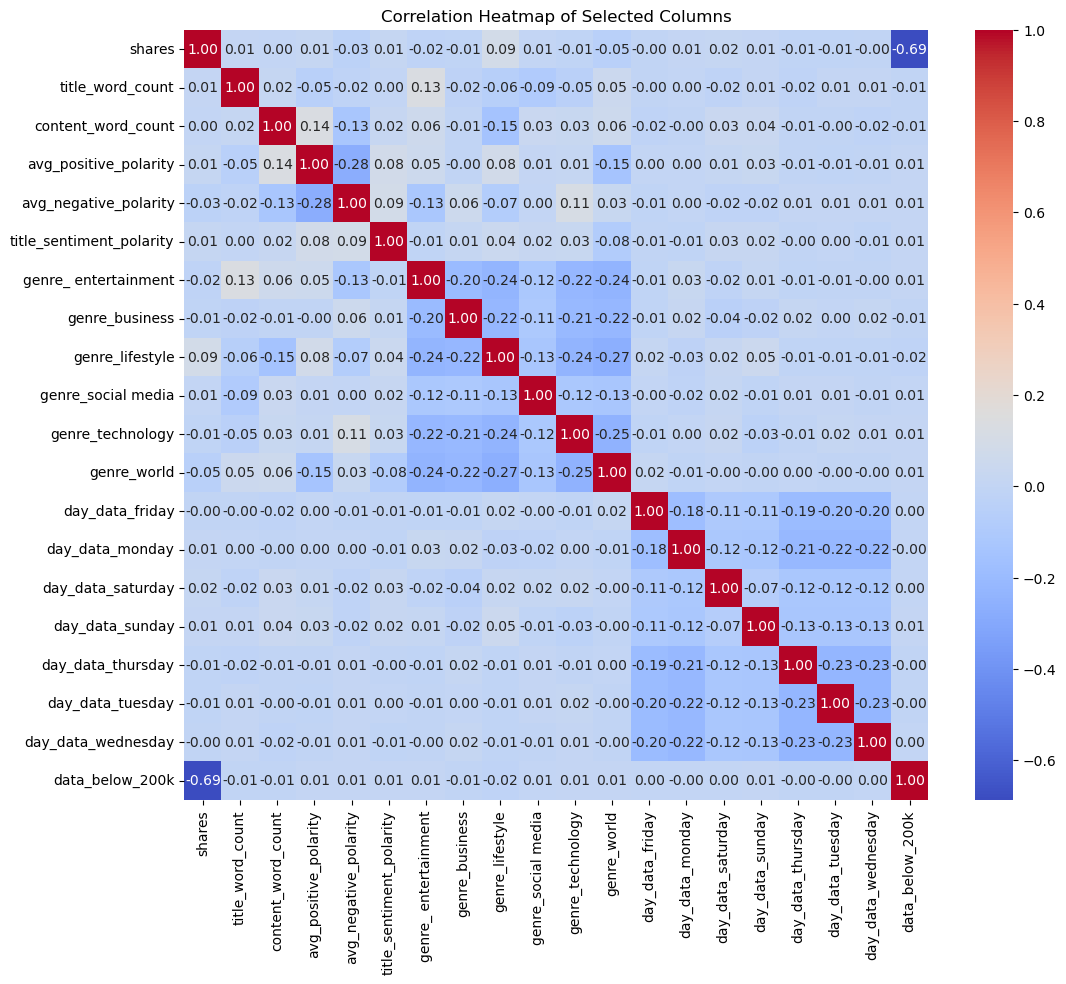

In [83]:
# Assuming 'data' is your DataFrame containing columns of interest
columns_of_interest = ['shares', 'title_word_count', 'content_word_count',
                       'avg_positive_polarity', 'avg_negative_polarity',
                       'title_sentiment_polarity', 'genre_ entertainment',
                       'genre_business', 'genre_lifestyle', 'genre_social media',
                       'genre_technology', 'genre_world', 'day_data_friday',
                       'day_data_monday', 'day_data_saturday', 'day_data_sunday',
                       'day_data_thursday', 'day_data_tuesday', 'day_data_wednesday','data_below_200k']

subset_data = h_data[columns_of_interest]

# Calculate correlations between selected columns
correlation_matrix = subset_data.corr()

# Plot heatmap of correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Selected Columns')
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9432\2037729434.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


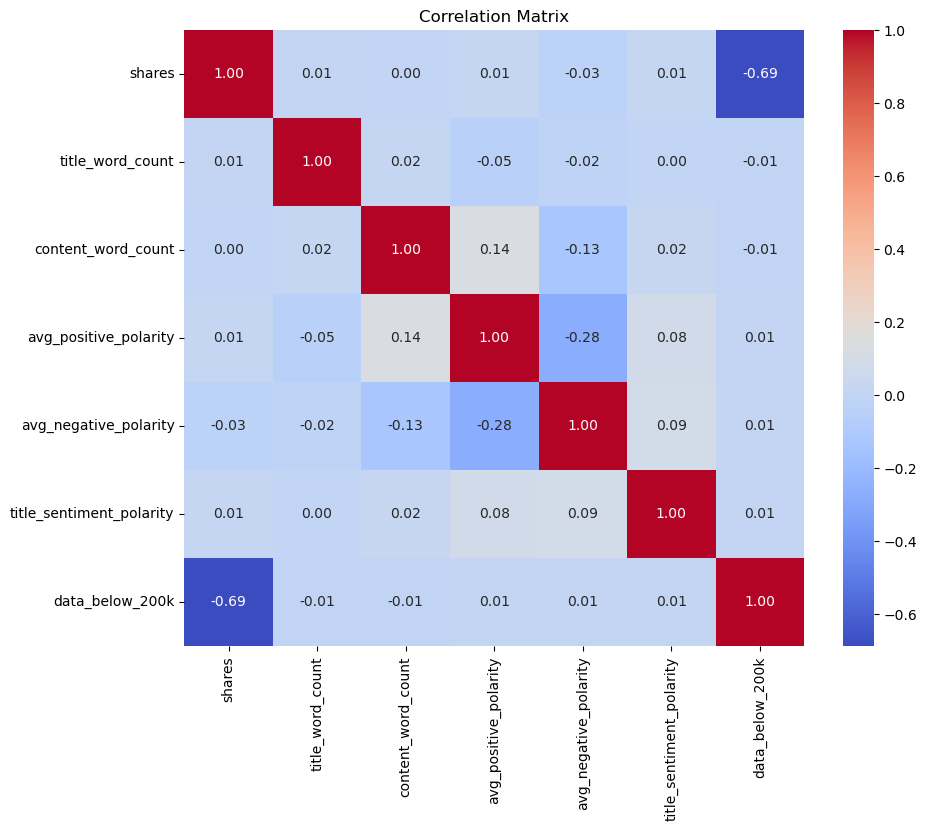

In [81]:
# Heatmap: Correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_14200\4078530539.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix_below_200k = data_below_200k.corr()


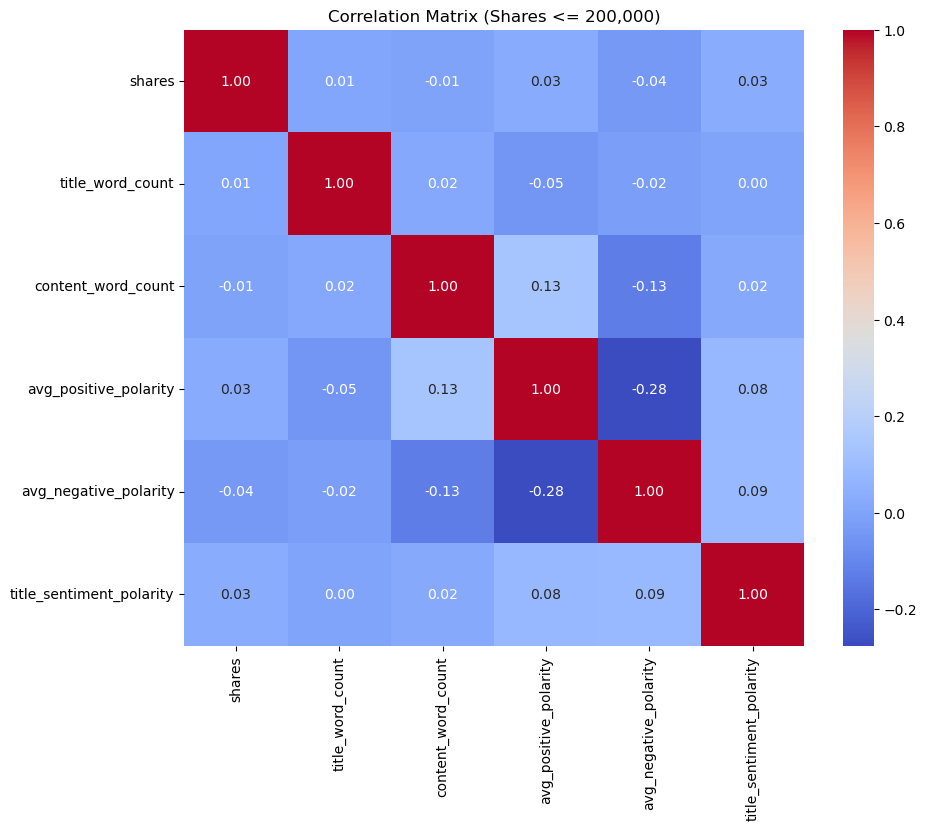

In [34]:
# Heatmap for correlation matrix of data points with shares <= 200000
plt.figure(figsize=(10, 8))
corr_matrix_below_200k = data_below_200k.corr()
sns.heatmap(corr_matrix_below_200k, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Shares <= 200,000)')
plt.show()

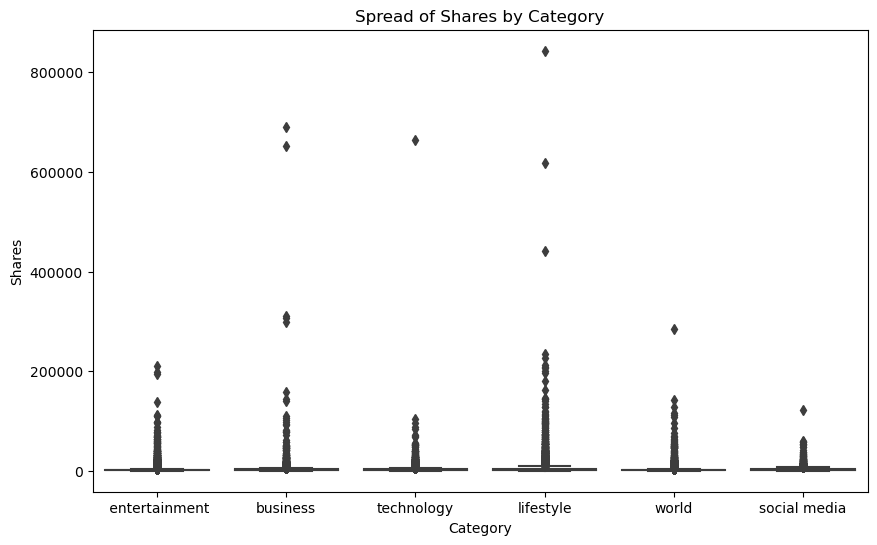

In [35]:
# Box Plot: Spread of shares for different categories
plt.figure(figsize=(10, 6))
sns.boxplot(x='genre', y='shares', data=data)
plt.title('Spread of Shares by Category')
plt.xlabel('Category')
plt.ylabel('Shares')
plt.show()

In [98]:
data.describe()

,shares,title_word_count,content_word_count,avg_positive_polarity,avg_negative_polarity,title_sentiment_polarity
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,3395.380184,10.398749,546.514731,0.353825,-0.259524,0.071425
std,11626.950749,2.114037,471.107508,0.104542,0.127726,0.265450
min,1.000000,2.000000,0.000000,0.000000,-1.000000,-1.000000
25%,946.000000,9.000000,246.000000,0.306244,-0.328383,0.000000
50%,1400.000000,10.000000,409.000000,0.358755,-0.253333,0.000000
75%,2800.000000,12.000000,716.000000,0.411428,-0.186905,0.150000
max,843300.000000,23.000000,8474.000000,1.000000,0.000000,1.000000


In [96]:
# Calculate medians for each genre
means = data.groupby('genre')['shares'].mean().reset_index()

In [101]:
means

,genre,shares
0,entertainment,2970.487034
1,business,3063.018536
2,lifestyle,5368.221790
3,social media,3629.383125
4,technology,3072.283283
5,world,2287.734069


In [100]:
means.describe()

,shares
count,6.000000
mean,3398.521306
std,1055.374072
min,2287.734069
25%,2993.619910
50%,3067.650910
75%,3490.108165
max,5368.221790


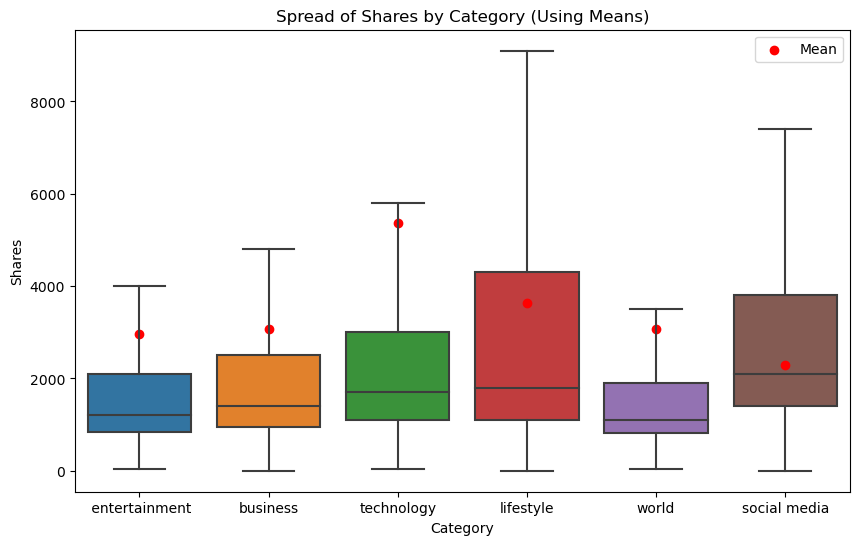

In [97]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='genre', y='shares', data=data, showfliers=False)  # Set showfliers=False to exclude outliers
plt.scatter(means.index, means['shares'], color='red', marker='o', label='Mean')  # Plotting medians
plt.title('Spread of Shares by Category (Using Means)')
plt.xlabel('Category')
plt.ylabel('Shares')
plt.savefig('Boxplot for Spread of Shares Mean.png')
plt.legend()
plt.show()

In [ ]:
# Calculate medians for each genre
medians = data.groupby('genre')['shares'].median().reset_index()

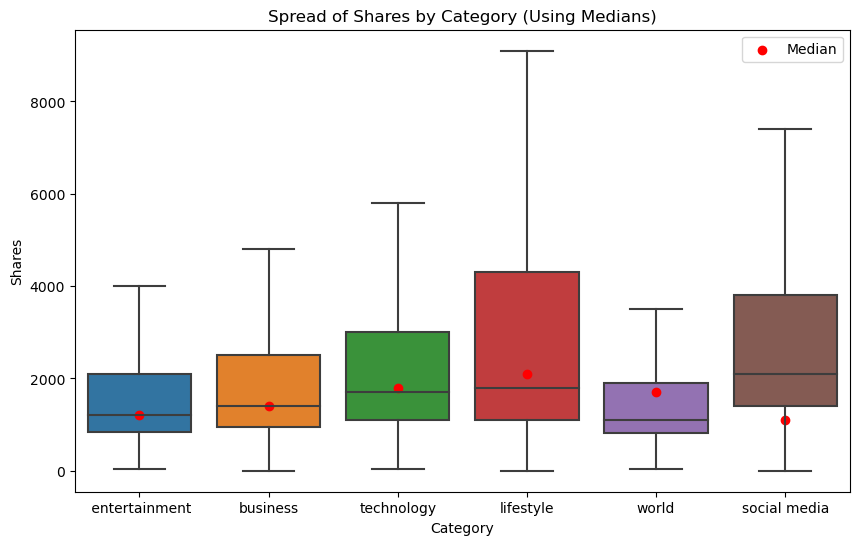

In [89]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='genre', y='shares', data=data, showfliers=False)  # Set showfliers=False to exclude outliers
plt.scatter(medians.index, medians['shares'], color='red', marker='o', label='Median')  # Plotting medians
plt.title('Spread of Shares by Category (Using Medians)')
plt.xlabel('Category')
plt.ylabel('Shares')
plt.savefig('Boxplot for Spread of Shares Median.png')
plt.legend()
plt.show()

In [38]:
# Calculate mode for each genre
modes = data.groupby('genre')['shares'].agg(lambda x: stats.mode(x)[0][0]).reset_index()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_14200\1833696629.py:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  modes = data.groupby('genre')['shares'].agg(lambda x: stats.mode(x)[0][0]).reset_index()


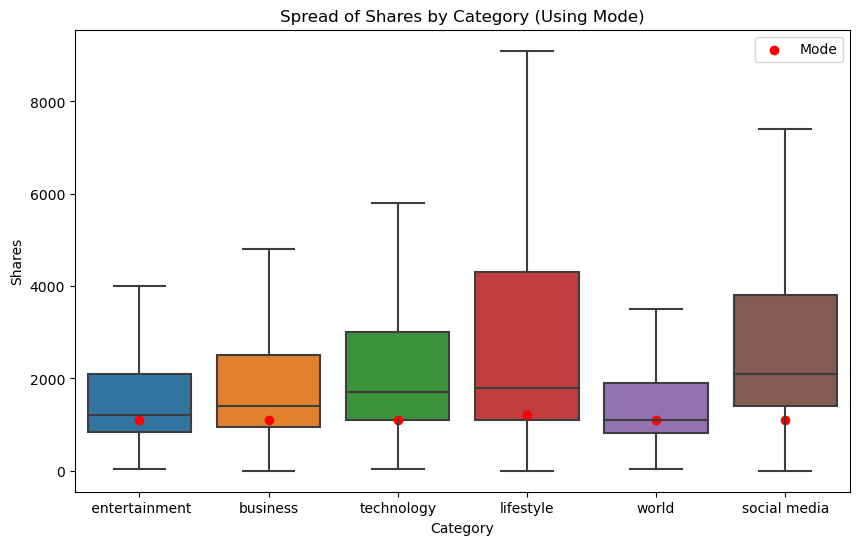

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='genre', y='shares', data=data, showfliers=False)  # Set showfliers=False to exclude outliers
plt.scatter(modes.index, modes['shares'], color='red', marker='o', label='Mode')  # Plotting modes
plt.title('Spread of Shares by Category (Using Mode)')
plt.xlabel('Category')
plt.ylabel('Shares')
plt.legend()
plt.savefig('Boxplot for Spread of Shares Mode.png')
plt.show()

In [40]:
data_below_10k = data[data['shares'] <= 10000]

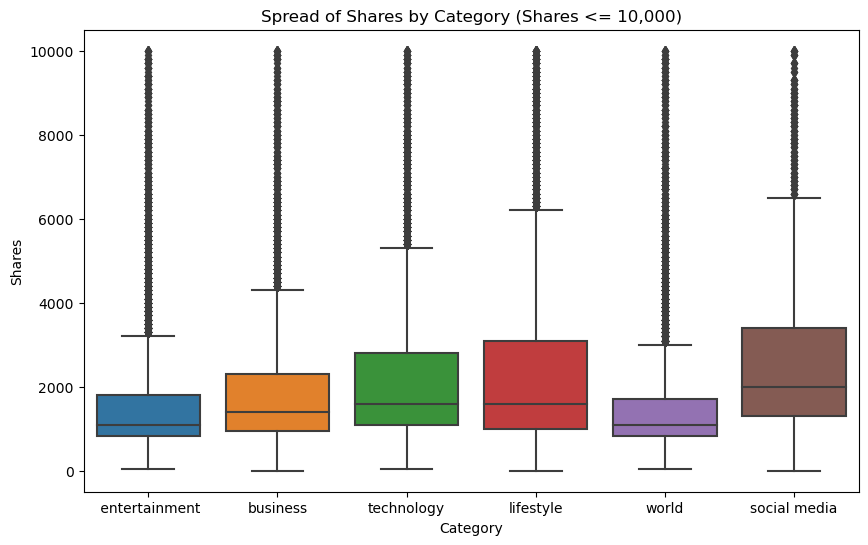

In [41]:
# Box Plot for spread of shares by category (for data points with shares <= 20000)
plt.figure(figsize=(10, 6))
sns.boxplot(x='genre', y='shares', data=data_below_10k)
plt.title('Spread of Shares by Category (Shares <= 10,000)')
plt.xlabel('Category')
plt.ylabel('Shares')
plt.show()

In [103]:
# Assuming 'data' is your DataFrame and 'links' is the column containing URLs
data['clean_title'] = data['link'].str.replace(r'^https?://.*?/\d{4}/\d{2}/\d{2}/', '').str.replace('-', ' ')

# Displaying the modified DataFrame
print(data.head())

                                                link           genre  \
0  http://mashable.com/2013/01/07/amazon-instant-...   entertainment   
1  http://mashable.com/2013/01/07/ap-samsung-spon...        business   
2  http://mashable.com/2013/01/07/apple-40-billio...        business   
3  http://mashable.com/2013/01/07/astronaut-notre...   entertainment   
4   http://mashable.com/2013/01/07/att-u-verse-apps/      technology   

         date day_data  shares  title_word_count  content_word_count  \
0  2013-01-07   monday     593              12.0               219.0   
1  2013-01-07   monday     711               9.0               255.0   
2  2013-01-07   monday    1500               9.0               211.0   
3  2013-01-07   monday    1200               9.0               531.0   
4  2013-01-07   monday     505              13.0              1072.0   

   avg_positive_polarity  avg_negative_polarity  title_sentiment_polarity  \
0               0.378636              -0.350000          

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9432\1448136199.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['clean_title'] = data['link'].str.replace(r'^https?://.*?/\d{4}/\d{2}/\d{2}/', '').str.replace('-', ' ')


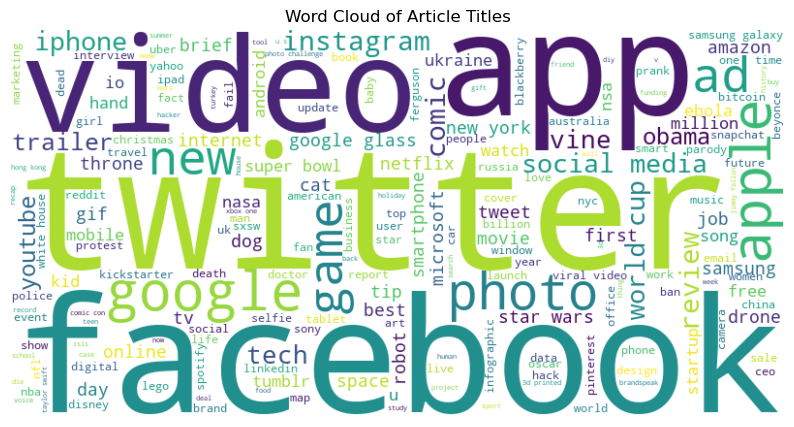

In [106]:
# Word Cloud: Most frequent words in article titles or content
# Assuming you have a function to extract words from titles or content
title_words = ' '.join(data['clean_title'])  # Replace 'title' with the column containing titles
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(title_words)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Article Titles')
plt.savefig('Word Cloud of Article Titles.png')
plt.show()

In [44]:
avg_pos_pol = data['avg_positive_polarity']
avg_neg_pol = data['avg_negative_polarity']
title_sent_pol = data['title_sentiment_polarity']

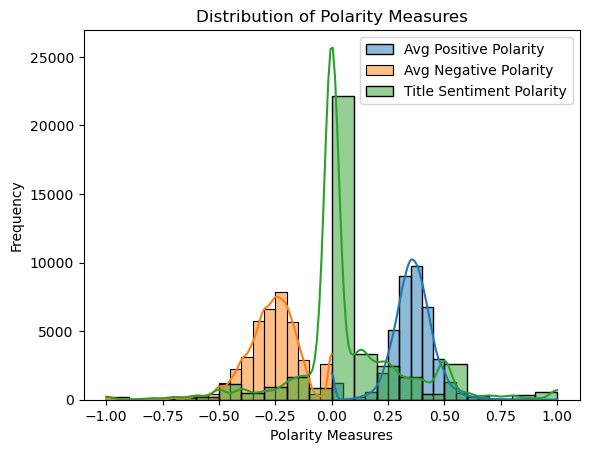

In [108]:
# Visualizations
# Distribution of polarity measures
sns.histplot(data['avg_positive_polarity'], bins=20, kde=True, label='Avg Positive Polarity')
sns.histplot(data['avg_negative_polarity'], bins=20, kde=True, label='Avg Negative Polarity')
sns.histplot(data['title_sentiment_polarity'], bins=20, kde=True, label='Title Sentiment Polarity')
plt.legend()
plt.xlabel('Polarity Measures')
plt.ylabel('Frequency')
plt.title('Distribution of Polarity Measures')
plt.savefig('Polarity Graph.png')
plt.show()

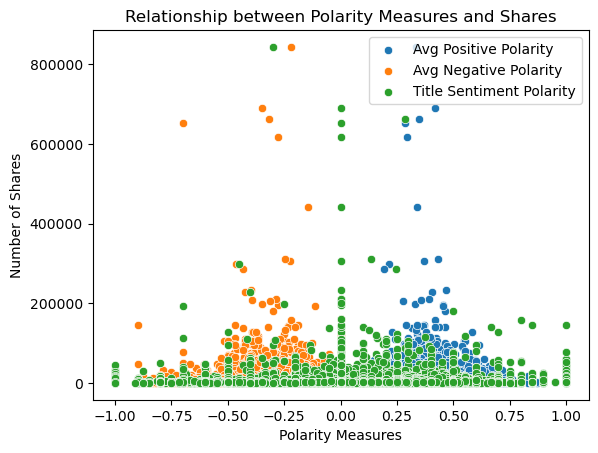

In [46]:
sns.scatterplot(x='avg_positive_polarity', y='shares', data=data, label='Avg Positive Polarity')
sns.scatterplot(x='avg_negative_polarity', y='shares', data=data, label='Avg Negative Polarity')
sns.scatterplot(x='title_sentiment_polarity', y='shares', data=data, label='Title Sentiment Polarity')
plt.xlabel('Polarity Measures')
plt.ylabel('Number of Shares')
plt.title('Relationship between Polarity Measures and Shares')
plt.legend()
plt.show()

In [47]:
data_below_10k = data[data['shares'] <= 10000]

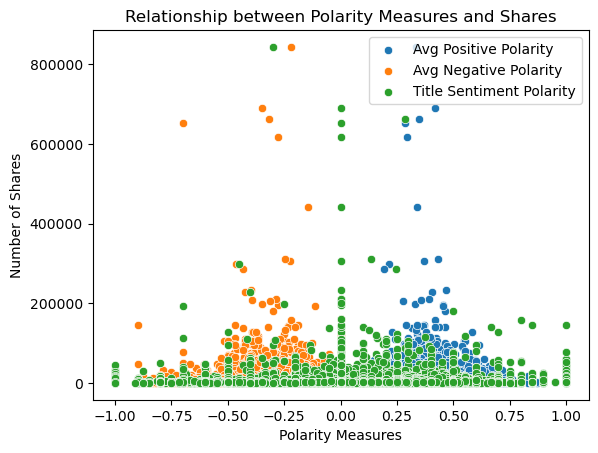

In [48]:
sns.scatterplot(x='avg_positive_polarity', y='shares', data=data, label='Avg Positive Polarity')
sns.scatterplot(x='avg_negative_polarity', y='shares', data=data, label='Avg Negative Polarity')
sns.scatterplot(x='title_sentiment_polarity', y='shares', data=data, label='Title Sentiment Polarity')
plt.xlabel('Polarity Measures')
plt.ylabel('Number of Shares')
plt.title('Relationship between Polarity Measures and Shares')
plt.legend()
plt.show()

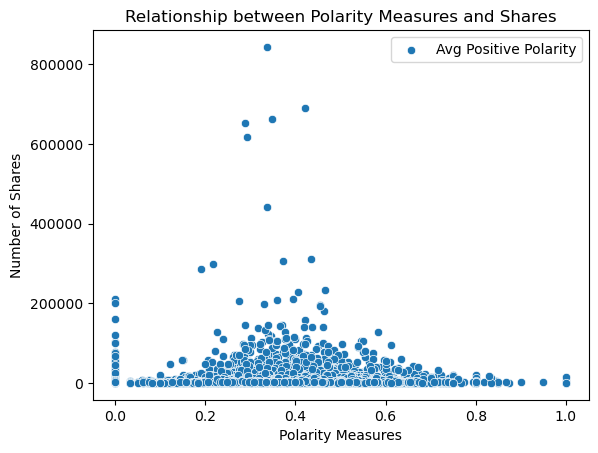

In [109]:
# Relationship between polarity measures and number of shares or publication days
sns.scatterplot(x='avg_positive_polarity', y='shares', data=data, label='Avg Positive Polarity')
plt.xlabel('Polarity Measures')
plt.ylabel('Number of Shares')
plt.title('Relationship between Polarity Measures and Shares')
plt.legend()
plt.savefig('Positive Polarity.png')
plt.show()

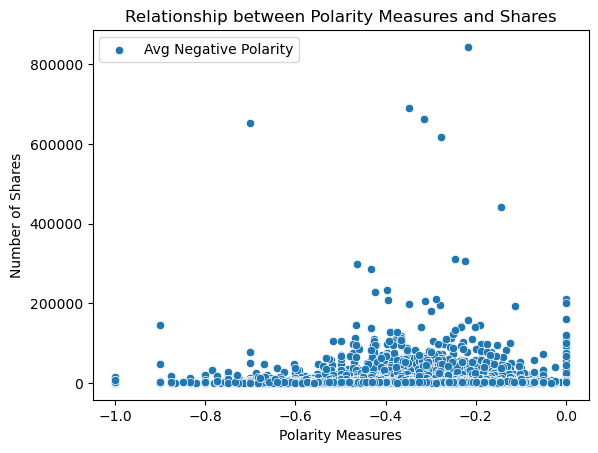

In [110]:
sns.scatterplot(x='avg_negative_polarity', y='shares', data=data, label='Avg Negative Polarity')
plt.xlabel('Polarity Measures')
plt.ylabel('Number of Shares')
plt.title('Relationship between Polarity Measures and Shares')
plt.legend()
plt.savefig('Negative Polarity.png')
plt.show()

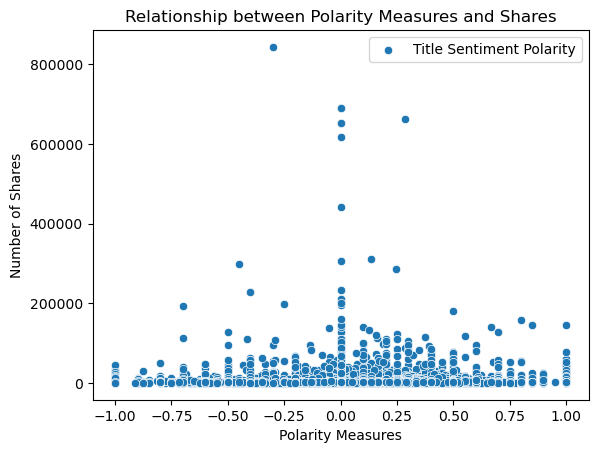

In [112]:
sns.scatterplot(x='title_sentiment_polarity', y='shares', data=data, label='Title Sentiment Polarity')
plt.xlabel('Polarity Measures')
plt.ylabel('Number of Shares')
plt.title('Relationship between Polarity Measures and Shares')
plt.legend()
plt.savefig('Sentiment Polarity.png')
plt.show()